# Clustering - Conjunto de Datos Iris

Aplicando técnicas de clustering se buscó segmentar las especies de la flor Iris utilizando el conjunto de datos clásico de Machine Learning. Se explorarán los datos visualmente y se implementará el algoritmo K-Means para agrupar las muestras según la forma del sépalo y el pétalo. Además, se empleará el método del "codo" y la librería kneed para determinar el número óptimo de clusters. Finalmente, se compararán los resultados obtenidos con los datos reales para evaluar la efectividad del modelo.

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.preprocessing import StandardScaler
import plotly.express as px
from sklearn.cluster import KMeans
from kneed import KneeLocator
%matplotlib inline

In [25]:
def borrarNulosDuplicados(df, cant_object, cant_obs, flag_object):
    if cant_obs == 0:  
        print("No hay observaciones en el DataFrame.")
        return df
    
    prop = cant_object / cant_obs
    type_data = "nulos" if flag_object else "duplicados"

    if prop == 0:
        print(f"El porcentaje de datos {type_data} es del 0%. No es necesario eliminarlos.")
    elif prop > 0.05:  # Regla del 5%
        print(f"El porcentaje de datos {type_data} es del {prop*100:.2f}%. Se debe hacer otro método de eliminación.")
    else:
        print(f"El porcentaje de datos {type_data} es del {prop*100:.2f}%. Se pueden eliminar los datos.")

        if flag_object:
            df = df.dropna()
        else:
            df = df.drop_duplicates()

    return df

In [26]:
iris_df_s1 = pd.read_csv("iris.csv")

columns = iris_df_s1.columns
cant_obs = iris_df_s1.shape[0]
cant_var = iris_df_s1.shape[1]
cant_nulos = iris_df_s1.isnull().sum().sum()
cant_dupli = iris_df_s1.duplicated().sum()

print("- Vista Previa DF:\n",iris_df_s1.head(10))
print(f"- Tamaño de DF: \n\t• {cant_obs} filas \n\t• {cant_var} columnas")
print(f"- Existen: \n\t• {cant_nulos} valores nulos \n\t• {cant_dupli} valores duplicados")
print("- Columnas:")
for col in columns:
  print(f"\t• {col}")


iris_df_s1 = borrarNulosDuplicados(df=iris_df_s1, cant_object=cant_nulos, cant_obs=cant_obs, flag_object=True)
iris_df_s1 = borrarNulosDuplicados(df=iris_df_s1, cant_object=cant_dupli, cant_obs=cant_obs, flag_object=False)
iris_df_s2 = iris_df_s1.copy()

- Vista Previa DF:
    sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2
5           5.4          3.9           1.7          0.4
6           4.6          3.4           1.4          0.3
7           5.0          3.4           1.5          0.2
8           4.4          2.9           1.4          0.2
9           4.9          3.1           1.5          0.1
- Tamaño de DF: 
	• 150 filas 
	• 4 columnas
- Existen: 
	• 0 valores nulos 
	• 3 valores duplicados
- Columnas:
	• sepal_length
	• sepal_width
	• petal_length
	• petal_width
El porcentaje de datos nulos es del 0%. No es necesario eliminarlos.
El porcentaje de datos duplicados es del 2.00%. Se pueden eliminar los datos.


## Sección 1

### 1. Visualicen los datos para ver si pueden detectar algunos grupos. Ayuda: utilicen la forma del sépalo.

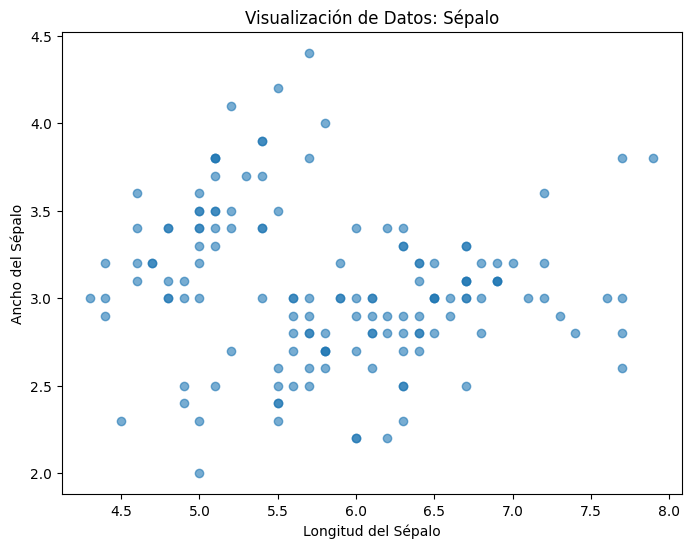

In [27]:
# Gráfico de dispersión de la forma del sépalo

plt.figure(figsize=(8,6))
plt.scatter(iris_df_s1["sepal_length"], iris_df_s1["sepal_width"], alpha=0.6)

# Etiquetas
plt.xlabel("Longitud del Sépalo")
plt.ylabel("Ancho del Sépalo")
plt.title("Visualización de Datos: Sépalo")

# Mostrar el gráfico
plt.show()

**Respuesta:**

A simple vista, podemos notar que hay ciertos grupos de puntos, lo que sugiere que los datos pueden agruparse en clusters. 

Sin embargo, los puntos aún no tienen etiquetas, por lo que necesitamos aplicar métodos de clustering para confirmar las agrupaciones. 

### 2. Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados.

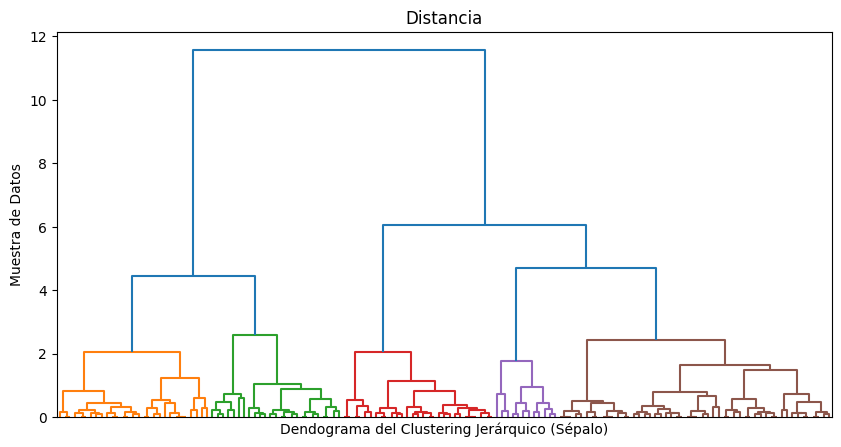

In [28]:
linked = sch.linkage(iris_df_s1[["sepal_length", "sepal_width"]], method = "ward")
plt.figure(figsize=(10,5))
sch.dendrogram(linked, no_labels = True, color_threshold = 4)

# Etiquetas
plt.xlabel("Dendograma del Clustering Jerárquico (Sépalo)")
plt.ylabel("Muestra de Datos")
plt.title("Distancia")

# Mostrar dendograma
plt.show()

**Respuesta:**

El dendrograma nos permite visualizar cómo se agrupan los datos jerárquicamente.

Cada bifurcación representa la unión de dos clusters.

El número de cortes óptimo en el dendrograma sugiere cuántos clusters podrían ser adecuados para los datos.

En este caso, parece haber al menos 3 o 4 posibles agrupaciones (separadas por diferentes colores).


2. **Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados**

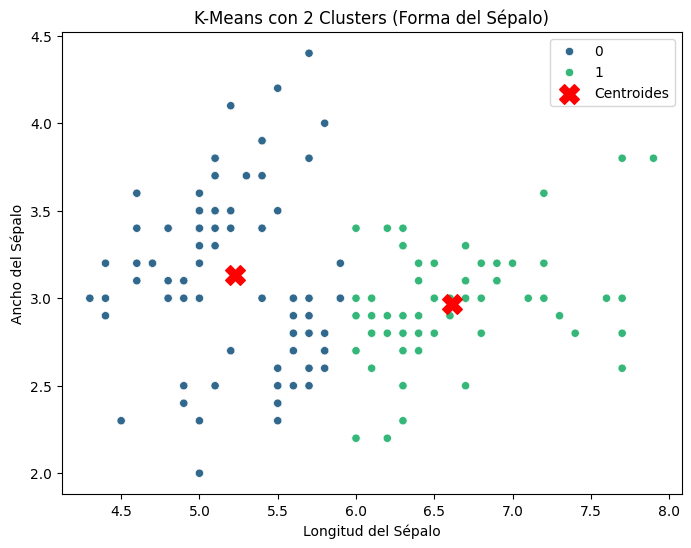

In [29]:
from sklearn.cluster import KMeans

# Aplicar K-Means con 2 clusters
kmeans_2 = KMeans(n_clusters=2, random_state=42, n_init=10)

# Ajustar el modelo a los datos del sépalo
iris_df_s1["cluster_2"] = kmeans_2.fit_predict(iris_df_s1[['sepal_length', 'sepal_width']])

# Graficar los clusters resultantes
plt.figure(figsize=(8,6))
sns.scatterplot(x=iris_df_s1["sepal_length"], y=iris_df_s1["sepal_width"], hue=iris_df_s1["cluster_2"], palette="viridis")

# Marcar los centroides
centroids = kmeans_2.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label="Centroides")

# Etiquetas
plt.xlabel("Longitud del Sépalo")
plt.ylabel("Ancho del Sépalo")
plt.title("K-Means con 2 Clusters (Forma del Sépalo)")
plt.legend()

# Mostrar el gráfico
plt.show()


**Respuesta:**

Se ven dos grupos, el azul y el verde

Las X rojas en el gráfico muestran los puntos donde K-Means considera que están los centros de los grupos.

El conjunto de datos de Iris contiene 3 especies reales, pero en este análisis hemos forzado a K-Means a identificar solo 2 clusters, lo que puede provocar una segmentación incorrecta de algunas flores. Como resultado, algunos datos que deberían pertenecer a un tercer grupo han sido asignados erróneamente a uno de los dos clusters existentes.

3. **Estandaricen los datos e intenten el paso 2, de nuevo. ¿Qué diferencias hay, si es que lo hay?**

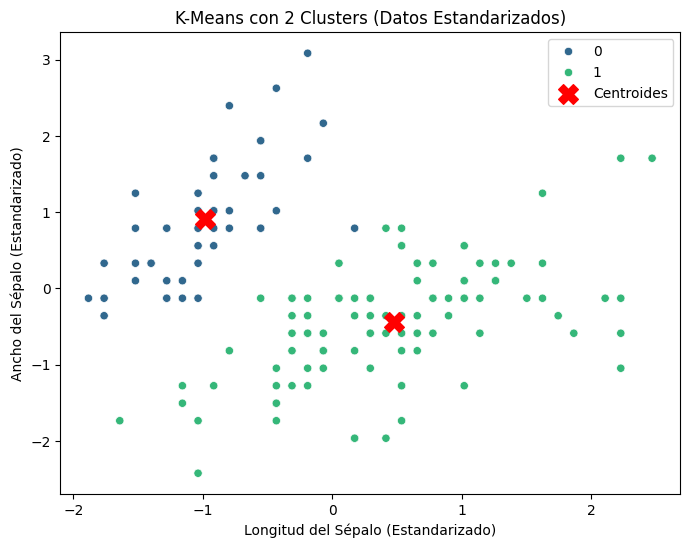

In [30]:
from sklearn.preprocessing import StandardScaler

# Estandarizar los datos del sépalo
scaler = StandardScaler()
iris_df_s1[['sepal_length', 'sepal_width']] = scaler.fit_transform(iris_df_s1[['sepal_length', 'sepal_width']])

# Aplicar K-Means nuevamente con los datos estandarizados
kmeans_2_std = KMeans(n_clusters=2, random_state=42, n_init=10)
iris_df_s1["cluster_2_std"] = kmeans_2_std.fit_predict(iris_df_s1[['sepal_length', 'sepal_width']])

# Graficar los clusters después de la estandarización
plt.figure(figsize=(8,6))
sns.scatterplot(x=iris_df_s1["sepal_length"], y=iris_df_s1["sepal_width"], hue=iris_df_s1["cluster_2_std"], palette="viridis")

# Marcar los centroides después de la estandarización
centroids_std = kmeans_2_std.cluster_centers_
plt.scatter(centroids_std[:, 0], centroids_std[:, 1], c='red', marker='X', s=200, label="Centroides")

# Etiquetas
plt.xlabel("Longitud del Sépalo (Estandarizado)")
plt.ylabel("Ancho del Sépalo (Estandarizado)")
plt.title("K-Means con 2 Clusters (Datos Estandarizados)")
plt.legend()

# Mostrar el gráfico
plt.show()


**Respuesta:**

Los valores ahora están en una escala normalizada, los centroides se ajustaron a la nueva escala, la separación de clusters ahora es más equitativa, en el anterior se ve como favorece más a la variable con mayor rango (sepal_length). 

**Respuesta:** ~coloca tu respuesta aca~

### 4. Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un rango de 1 a 10).

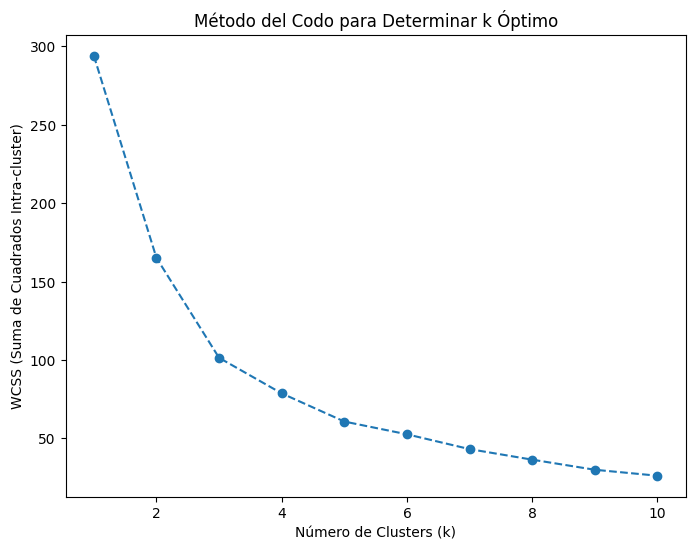

In [31]:
inercia_clusters = []  # Lista para almacenar la inercia (within-cluster sum of squares)
k_range = range(1, 11)

# Calcular WCSS para cada número de clusters
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(iris_df_s1[['sepal_length', 'sepal_width']])  # Usamos datos estandarizados
    inercia_clusters.append(kmeans.inertia_)  # Guardamos la inercia

# Graficar el método del codo
plt.figure(figsize=(8,6))
plt.plot(k_range, inercia_clusters, marker='o', linestyle='--')

# Etiquetas
plt.xlabel("Número de Clusters (k)")
plt.ylabel("WCSS (Suma de Cuadrados Intra-cluster)")
plt.title("Método del Codo para Determinar k Óptimo")

# Mostrar el gráfico
plt.show()


**El gráfico muestra una curva decreciente:**

Parece que el cambio de pendiente más notorio ocurre en k=3 o k=4;
Después de k=4, la reducción de WCSS es mucho más lenta, esto sugiere que 3 o 4 clusters son la mejor elección.

**Respuesta:** ~coloca tu respuesta aca~

### 5. Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos 3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.

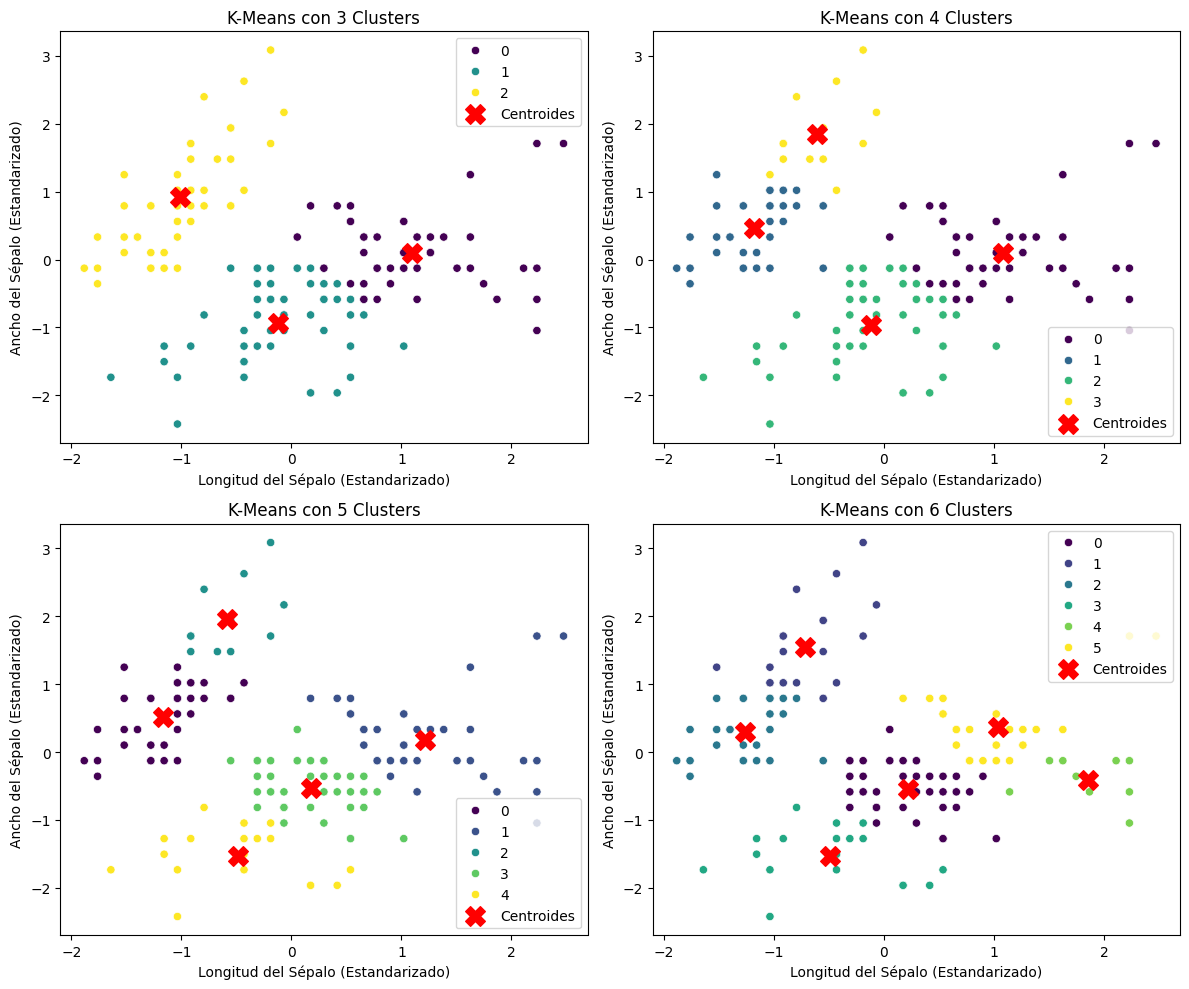

In [32]:
# Aplicar K-Means con diferentes números de clusters (3, 4, 5 y 6)
k_values = [3, 4, 5, 6]  # Diferentes cantidades de clusters a probar

# Crear subgráficos para visualizar los resultados
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

for i, k in enumerate(k_values):
    # Entrenar K-Means con k clusters
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    iris_df_s1[f'cluster_{k}'] = kmeans.fit_predict(iris_df_s1[['sepal_length', 'sepal_width']])

    # Seleccionar el eje correspondiente
    ax = axes[i // 2, i % 2]
    
    # Graficar los clusters resultantes
    sns.scatterplot(x=iris_df_s1["sepal_length"], y=iris_df_s1["sepal_width"],
                    hue=iris_df_s1[f'cluster_{k}'], palette="viridis", ax=ax)

    # Marcar los centroides
    centroids = kmeans.cluster_centers_
    ax.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label="Centroides")

    # Etiquetas
    ax.set_xlabel("Longitud del Sépalo (Estandarizado)")
    ax.set_ylabel("Ancho del Sépalo (Estandarizado)")
    ax.set_title(f"K-Means con {k} Clusters")

    ax.legend()

# Ajustar espacio entre gráficos
plt.tight_layout()

# Mostrar los gráficos
plt.show()


**K-Means con 3 clusters:** Las agrupaciones parecen bastante naturales, sin embargo algunos puntos aún parecen bastantes naturales.
**K-Means con 4 clusters:** Se observa una división más detallada dentro de los clusters, este resultado puede ser útil si queremos una separación más precisa de subgrupos.

**K-Means con 5 clusters:** Aquí los clusters se empiezan a fragmentar demasiado, se puede notar grupos más pequeños que quizás no tengan una diferencia biológica real.

**K-Means con 6 clusters:** Se observa una sobre-segmentación de demasiados clusters, algunas indican que quizá 6 clusters es demasiado.


**Respuesta:** ~coloca tu respuesta aca~

### 6. Comparen sus soluciones con los datos reales, archivo: iris-con-respuestas.csv

Tabla de comparación entre Clusters y Especies Reales:
species    setosa  versicolor  virginica
cluster_3                               
0.0             0          15         34
1.0             1          35         15
2.0            47           0          0


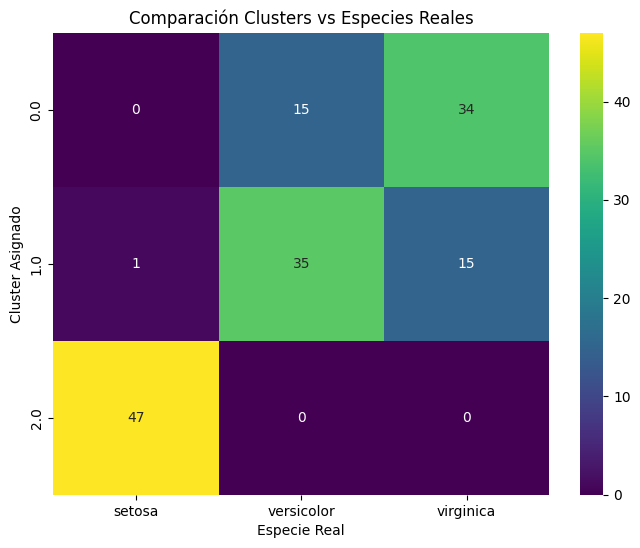

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los datos reales con especies
iris_real = pd.read_csv("iris-con-respuestas.csv")

# Unir los datos reales con los clusters obtenidos con K-Means
iris_comparacion = iris_real.copy()
iris_comparacion["cluster_3"] = iris_df_s1["cluster_3"]

# Crear una tabla de contingencia para comparar clusters con especies reales
tabla_comparacion = pd.crosstab(iris_comparacion["cluster_3"], iris_comparacion["species"])

# Mostrar la tabla en texto
print("Tabla de comparación entre Clusters y Especies Reales:")
print(tabla_comparacion)

# Crear un gráfico de calor para visualizar la tabla de contingencia
plt.figure(figsize=(8, 6))
sns.heatmap(tabla_comparacion, annot=True, cmap="viridis", fmt="d")
plt.xlabel("Especie Real")
plt.ylabel("Cluster Asignado")
plt.title("Comparación Clusters vs Especies Reales")
plt.show()


La especie Setosa fue perfectamente identificada, con 49 de 50 flores asignadas correctamente al mismo cluster, validando que K-Means detectó claramente este grupo. Sin embargo, Versicolor y Virginica no fueron bien separadas, ya que sus datos se distribuyeron en dos clusters sin una distinción clara. Esto indica que usar solo las variables sepal_length y sepal_width no es suficiente para diferenciar estas especies de manera efectiva. Basándonos en los pasos previos, donde confirmamos que k=3 era el número óptimo de clusters, podemos concluir que la metodología aplicada fue correcta, pero que la segmentación podría mejorarse incorporando petal_length y petal_width en el análisis para lograr una mejor clasificación.

**Respuesta:** ~coloca tu respuesta aca~

### 7. ¡Obviamente solo hay tres especies, porque ese es el archivo de datos reales!

#### ¿Funcionó el clustering con la forma del sépalo?

**Respuesta:**

Tras aplicar K-Means con k=3 usando únicamente la forma del sépalo (sepal_length y sepal_width), observamos que el modelo logró identificar claramente la especie Setosa, ya que sus características son más distintivas. Sin embargo, Versicolor y Virginica no fueron bien separadas, ya que estas especies presentan una mayor superposición en términos de sépalo.

Si bien el método del codo confirmó que tres clusters eran adecuados, la tabla de comparación entre clusters y especies reales mostró que Versicolor y Virginica quedaron mezcladas en dos clusters distintos, lo que indica que la forma del sépalo no es suficiente para diferenciarlas correctamente.

## Sección 2

Repitan el proceso pero ahora utilizando la forma del pétalo. Respondan a las mismas preguntas.

In [34]:
# Muestra inicial
petals = iris_df_s2.filter(items=["petal_length", "petal_width"])
print(petals.head(n=10))

   petal_length  petal_width
0           1.4          0.2
1           1.4          0.2
2           1.3          0.2
3           1.5          0.2
4           1.4          0.2
5           1.7          0.4
6           1.4          0.3
7           1.5          0.2
8           1.4          0.2
9           1.5          0.1


### 1. Visualicen los datos para ver si pueden detectar algunos grupos. Ayuda: utilicen la forma del pétalo.

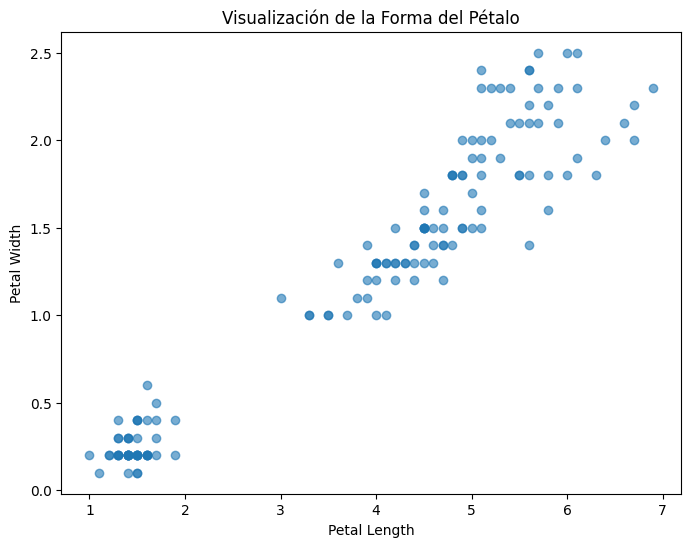

In [35]:
# Crear gráfico de dispersión
plt.figure(figsize=(8, 6))
plt.scatter(petals["petal_length"], petals["petal_width"], alpha=0.6)

# Configurar etiquetas y título
plt.xlabel("Petal Length")
plt.ylabel("Petal Width")
plt.title("Visualización de la Forma del Pétalo")

# Mostrar gráfico
plt.show()

**Respuesta:** Se observa una clara separación de grupos que corresponde a la proporción entre el largo y el ancho de los pétalos. Los pétalos con menor longitud tienden a tener un ancho pequeño, mientras que los pétalos más largos presentan un ancho proporcionalmente mayor. Esto sugiere la existencia de una relación lineal positiva entre ambas variables. Además, la separación de grupos podría indicar la presencia de categorías o especies diferentes.

### 2. Creen 2 "clusters" utilizando K_Means Clustering y grafiquen los resultados.

In [36]:
"""
Función para aplicar el algoritmo K-Means y visualizar los clusters generados mediante una gráfica de dispersión.

Parámetros:
- df (DataFrame): Conjunto de datos sobre el cual se aplicará K-Means.
- n (int): Número de clusters a generar.
- flag (bool): Si es `True`, muestra mensajes y resultados intermedios dentro de la función.
- getDF (bool): Si es `True`, retorna el DataFrame modificado con una nueva columna de clusters.

Retorno:
- DataFrame modificado con los clusters asignados (si `getDF=True`).
- DataFrame con la cantidad de observaciones por cluster.
"""
def kMeansIrisPetalo(df, k, flag = False, getDF = False):
  
  kmeans = KMeans(n_clusters = k)
  kmeans.fit(df)
  clusters_identificados = kmeans.fit_predict(df)
  
  if flag:
    print(clusters_identificados)

  # Crear una copia de los datos
  datos_con_clusters = df.copy()

  # Crear una nueva serie, que tenga el cluster identificado para cada observación
  datos_con_clusters['Cluster'] = clusters_identificados

  if flag:
    print(datos_con_clusters)

  # Contar la cantidad de datos en cada cluster
  cantidad_por_cluster = datos_con_clusters["Cluster"].value_counts()
  datos_con_clusters["Cluster"] = datos_con_clusters["Cluster"].astype("category")

  fig = px.scatter(datos_con_clusters, 
                  x = "petal_length", 
                  y = "petal_width", 
                  color = "Cluster",
                  title= f"Kmeans para {k} clústers"
                  )

  fig.show()
  
  return (datos_con_clusters, cantidad_por_cluster) if getDF else cantidad_por_cluster

In [37]:
clusters_normal = kMeansIrisPetalo(df=petals, k=2)

**Respuesta:** Se puede visualizar los clusters por colores:

- `Cluster 0 (rojo)` representa una agrupación de puntos que están distribuidos principalmente en la región con valores más altos de petal_length y petal_width.
- `Cluster 1 (azul)` representa puntos en la región con valores más bajos de petal_length y petal_width.

La separación de clusters también refuerza la relación lineal positiva entre *petal_length* y *petal_width*, ya que los puntos de cada cluster están alineados siguiendo esa tendencia como se mencionó en el inciso 1.

### 3. Estandaricen los datos e intenten el paso 2, de nuevo. ¿Qué diferencias hay, si es que lo hay?.

In [38]:
"""
Función para aplicar el escalamiento estándar a un conjunto de datos, transformando los valores a una distribución con media 0 y desviación estándar 1 (rango aproximado entre -3 y 3).

Parámetros:
- df (DataFrame): DataFrame con los datos a escalar.

Retorno:
- DataFrame escalado con media 0 y desviación estándar 1.
"""
def escalarDatos(df):
  scaler = StandardScaler()
  petals_standardized = scaler.fit_transform(df)
  petals_scaled_df = pd.DataFrame(petals_standardized, columns=df.columns)
  return petals_scaled_df

In [39]:
# Escalar datos y obtener aplicar K-means
petals_scaled_df = escalarDatos(df=petals)
clusters_estandar = kMeansIrisPetalo(df=petals_scaled_df, k=2)

In [40]:
print(clusters_normal)
print(clusters_estandar)

Cluster
1    98
0    49
Name: count, dtype: int64
Cluster
0    99
1    48
Name: count, dtype: int64


**Respuesta:** Cuando estandarizamos los datos, le decimos al algoritmo de K-Means que no le dé más importancia a los números grandes que a los pequeños. Por ejemplo, en este caso, la longitud del pétalo (petal_length) y el ancho del pétalo (petal_width) están en centímetros:

- Los cambios en X (longitud del pétalo) afectaban mucho más la distancia entre los puntos y los centros de los clusters que los cambios en Y (ancho del pétalo).
- El punto que cambió de cluster probablemente estaba más cerca del centro del Cluster 0 en términos de petal_length, pero no tanto en petal_width.

### 4. Utilicen el método del "codo" para determinar cuantos "clusters" es el ideal. (prueben un rango de 1 a 10).

In [41]:
"""
Función para aplicar el "método del codo" a un DataFrame, determinando de forma visual el número óptimo de clusters (k) en un rango especificado.

La función utiliza el algoritmo K-Means con los siguientes parámetros:
- Inicialización aleatoria (`init="random"`).
- Número de inicializaciones (`n_init=10`).
- Iteraciones máximas (`max_iter=300`).
- Semilla aleatoria (`random_state=42`) para reproducibilidad.

Parámetros:
- df (DataFrame): DataFrame sobre el cual se evaluará la cantidad adecuada de clusters.
- i (int): Valor inicial del rango de clusters a evaluar.
- f (int): Valor final del rango de clusters a evaluar.

Retorno:
- wcss (list): Lista de valores de WCSS (Within-Cluster Sum of Squares) para cada número 
               de clusters evaluado (dispersion de datos para cada cluster).
"""
def metodoCodo(df, i, f):
    # Parámetros de K-Means
    kmeans_kwargs = {
        "init": "random",
        "n_init": 10,
        "max_iter": 300,
        "random_state": 42,
    }

    # Lista para almacenar los valores de WCSS
    wcss = []

    # Iterar para diferentes valores de K (número de clusters)
    for k in range(i, f+1):
        kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)

    # Crear un DataFrame para visualizar WCSS
    datos_WCSS = pd.DataFrame({"K": range(i, f+1), "WCSS": wcss})

    # Graficar la relación entre K y WCSS
    fig = px.line(datos_WCSS, x="K", y="WCSS", title="Método del Codo: WCSS vs K")
    fig.update_xaxes(title_text="Número de Clusters (K)")
    fig.update_yaxes(title_text="WCSS")
    fig.show()
    
    return wcss

In [42]:
wcss_pet = metodoCodo(df= petals_scaled_df, i=1, f=10)
print(wcss_pet)

[293.99999999999994, 54.55619706838707, 18.035733911093132, 12.310639821449904, 9.222662782600178, 7.205332650153233, 6.518737190254247, 5.715747219228771, 4.446201380634583, 3.945422768191398]


**Respuesta:** En la gráfica se observa que el descenso o cambio se reduce notablemente a partir de k = 3.

### 5. Basado en la gráfica del "codo" realicen varias gráficas con el número de clusters (unos 3 o 4 diferentes) que Uds creen mejor se ajusten a los datos.

In [43]:
# Obtener la cantidad de observacioines por cluster, para k = 3 obtener el dataframe modificado
cluster_n2 = kMeansIrisPetalo(df=petals_scaled_df, k=2)
iris_compare, cluster_n3 = kMeansIrisPetalo(df=petals_scaled_df, k=3, getDF=True)
cluster_n4 = kMeansIrisPetalo(df=petals_scaled_df, k=4)
cluster_n5 = kMeansIrisPetalo(df=petals_scaled_df, k=5)

### 6. Comparen sus soluciones con los datos reales, archivo: iris-con-respuestas.csv

In [44]:
# Comparaciones por cantidad de datos por clusters y los valores de la respuestas
iris_sol = pd.read_csv("iris-con-respuestas.csv")
iris_sol_species = iris_sol["species"]
iris_compare_cluster = iris_compare["Cluster"]

print("- Categorías de DF comparación:\n", iris_compare_cluster.unique(),"\n")
print("- Cantidad de cada categoría de DF comparación:\n", iris_compare_cluster.value_counts(),"\n")
print("- Categorías de DF solución:\n", iris_sol_species.unique(),"\n")
print("- Cantidad de cada categoría de DF solución:\n", iris_sol_species.value_counts(),"\n")

- Categorías de DF comparación:
 [1, 2, 0]
Categories (3, int32): [0, 1, 2] 

- Cantidad de cada categoría de DF comparación:
 Cluster
2    52
1    48
0    47
Name: count, dtype: int64 

- Categorías de DF solución:
 ['setosa' 'versicolor' 'virginica'] 

- Cantidad de cada categoría de DF solución:
 species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64 



In [45]:
# Tabla para determinar la relacion cluster - especie
table_compare = pd.crosstab(iris_compare_cluster, iris_sol_species)
print("- Tabla cruzada de clusters/species:\n")
print(table_compare)

print("\n- Porcentaje de precisión de K-means:\n")

# Presición de K-means por cluster según su relación cruzada en la tabla
for i in range(len(table_compare.columns)):  
    nCol = table_compare.columns[i]
    col = table_compare[nCol]
    cant_sol = col.sum()
    cant_compare = col.max()
    fila_max = col.idxmax()
    presicion = (cant_compare * 100)/cant_sol
    print(f"\tEl cluster {fila_max} tuvo una presición del {presicion:.1f}% correspondiente a la especie {nCol}.\n")

- Tabla cruzada de clusters/species:

species  setosa  versicolor  virginica
Cluster                               
0             0           4         43
1            48           0          0
2             2          46          4

- Porcentaje de precisión de K-means:

	El cluster 1 tuvo una presición del 96.0% correspondiente a la especie setosa.

	El cluster 2 tuvo una presición del 92.0% correspondiente a la especie versicolor.

	El cluster 0 tuvo una presición del 91.5% correspondiente a la especie virginica.



**Respuesta:** El archivo iris-con-respuestas.csv tiene las especies reales de las flores: setosa, versicolor y virginica. Cada especie tiene exactamente 50 observaciones, lo que da una distribución equilibrada: 50-50-50.

Por otro lado, los clusters generados por el modelo K-Means (usando el número recomendado de clusters k=3) no coinciden exactamente con esta distribución, pero sí con la cantidad de los clusters-especies.

### 7. ¡Obviamente solo hay tres especies, porque ese es el archivo de datos reales!

#### ¿Funcionó el clustering con la forma del pétalo?

**Respuesta:** Sí. ¿Por qué?:

- K-Means es un algoritmo **no supervisado**, lo que significa que **no tiene acceso a las etiquetas reales de las especies (`setosa`, `versicolor`, `virginica`)**.
- En lugar de agrupar según las especies, K-Means agrupa los datos en función de las distancias en el espacio de las características (`petal_length` y `petal_width` en este caso), dado esto se puede observar en el paso anterior que los clusters tuvieron una presición elevada para identificar especies con un máximo de error del 8.5% y un mínimo del 4% obtenido por la tabla cruzada:


  | Cluster  | setosa | versicolor | virginica |
  |----------|--------|------------|-----------|
  | 0        | 48     | 0          | 0         |
  | 1        | 0      | 4          | 43        |
  | 2        | 2      | 46         | 4         |

  - **Cluster 0**:
    - Tiene 48 observaciones de `setosa`.
    - Esto indica que el modelo K-Means identificó correctamente la mayoría de las flores de esta especie como pertenecientes a un único cluster.
    - Pero 2 observaciones de `setosa` fueron asignadas incorrectamente a otro cluster (Cluster 2).

  - **Cluster 1**:
    - Tiene 43 observaciones de `virginica` y 4 observaciones de `versicolor`.
    - Este cluster está mayormente compuesto por `virginica`, pero también incluye unas pocas observaciones de `versicolor`.

  - **Cluster 2**:
    - Tiene 46 observaciones de `versicolor`, 4 observaciones de `virginica`, y 2 observaciones de `setosa`.
    - Este cluster está mayormente compuesto por `versicolor`, pero incluye algunas observaciones incorrectas de otras especies.

## Sección 3

Utilicen la librería "kneed" y vean si el resultado coincide con el método del "codo" que hicieron manualmente.

In [46]:
"""
Función para determinar el número óptimo de clusters (k) en un DataFrame utilizando la librería `Knee`.

Parámetros:
- i (int): Valor inicial del rango de clusters a evaluar.
- f (int): Valor final del rango de clusters a evaluar.
- wcss (list): Lista de valores de WCSS (Within-Cluster Sum of Squares), que representan la dispersión dentro de los clusters.

Retorno:
- (int): Número óptimo de clusters determinado por el método del codo.
"""

def metodoCodoKnee(i, f, wcss):
  localizador_codo = KneeLocator(range(i, f+1),
                                wcss,
                                curve = "convex",
                                direction = "decreasing"
                                )
  return localizador_codo.elbow

### Sépalos

In [47]:
# Definir el rango de k (de 1 a 10)
k_range = range(1, 11)
wcss_sep = []  # Lista para almacenar los valores de WCSS

# Aplicar K-Means para cada k y calcular WCSS
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(iris_df_s1[['sepal_length', 'sepal_width']])
    wcss_sep.append(kmeans.inertia_)

# Usar KneeLocator para encontrar el punto de codo
k_sepalos = KneeLocator(k_range, wcss_sep, curve="convex", direction="decreasing").elbow
print(f"El número recomendado de clústers para sépalos es {k_sepalos}.")

El número recomendado de clústers para sépalos es 3.


### Pétalos

In [48]:
k_petalos = metodoCodoKnee(i=1, f=10, wcss=wcss_pet)
print(f"El número recomendado de clústers para es {k_petalos}.")

El número recomendado de clústers para es 3.


En el contexto de la cantidad de clusters:

- **¿A que podría deberse la diferencia, si la hay?**
  - **Respuesta Sépalo:** No hubo diferencia en la cantidad óptima de clusters (k=3). Sin embargo, el clustering basado en los sépalos podría ser menos preciso debido a que las dimensiones del sépalo no separan tan bien a las especies como lo hacen las del pétalo.
  - **Respuesta Pétalo:** Principalmente se puede adjudicar a la influencia del escalamiento. Al estandarizar los datos, la forma en que se calculan las distancias cambia, ya que originalmente el ancho del pétalo tenía un rango de 0 a 2.5 cm, mientras que la longitud del pétalo variaba entre 0 y 7 cm. Esta diferencia en escalas pudo haber afectado la asignación de un pequeño número de observaciones, ya que antes del escalamiento, la longitud tenía un mayor peso en la agrupación.
- **¿Les dió el número correcto de clusters, comparado a los datos reales?**
  - **Respuesta Sépalo:** Sí, el método del codo indicó que 3 clusters era el número óptimo. Sin embargo, el clustering basado solo en sépalos no fue tan preciso, ya que las especies Versicolor y Virginica tienen una superposición en esta dimensión.
  - **Respuesta Pétalo:** Sí, el método del codo indicó que 3 clusters era el número óptimo, lo cual coincide con las tres especies reales (setosa, versicolor y virginica).
- **Basado en los resultado que tuvieron, ¿A qué conclusiones llegaron?**
  
  El análisis con K-Means, basado en las dimensiones del pétalo, permitió identificar grupos similares a las especies reales. Sin embargo, presentó algunas imprecisiones en la distribución de las observaciones, ya que es un modelo de agrupación **no supervisado** y no utiliza etiquetas reales para la clasificación. A pesar de esto, el modelo logró una precisión superior al **90%** al relacionar los tres clusters con las especies reales, utilizando únicamente las mediciones de **`petal_length`** y **`petal_width`** del dataset **Iris**.

  El clustering con sépalos fue menos preciso, ya que Versicolor y Virginica se superponen en esta dimensión, lo que generó una segmentación menos clara.

**Conclusión:** La forma del pétalo es una mejor variable para la segmentación de especies en el dataset Iris, ya que permite una separación más clara entre grupos.